Generación 1


C:\Users\esco1\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Cromosoma: {'learning_rate': 0.01, 'batch_size': 128, 'num_filters': 16, 'dense_units': 84, 'activation': 'relu', 'optimizer': 'sgd', 'dropout_rate': 0.7}, Fitness: 0.9441666603088379
Nuevo mejor modelo con fitness 0.9441666603088379
Cromosoma: {'learning_rate': 0.1, 'batch_size': 32, 'num_filters': 16, 'dense_units': 120, 'activation': 'relu', 'optimizer': 'sgd', 'dropout_rate': 0.7}, Fitness: 0.9903333187103271
Nuevo mejor modelo con fitness 0.9903333187103271
Cromosoma: {'learning_rate': 0.1, 'batch_size': 128, 'num_filters': 16, 'dense_units': 84, 'activation': 'relu', 'optimizer': 'adam', 'dropout_rate': 0.7}, Fitness: 0.09616667032241821
Cromosoma: {'learning_rate': 0.1, 'batch_size': 128, 'num_filters': 16, 'dense_units': 84, 'activation': 'relu', 'optimizer': 'sgd', 'dropout_rate': 0.7}, Fitness: 0.9868333339691162
Cromosoma: {'learning_rate': 0.05, 'batch_size': 128, 'num_filters': 6, 'dense_units': 120, 'activation': 'relu', 'optimizer': 'sgd', 'dropout_rate': 0.5}, Fitness: 

Cromosoma: {'learning_rate': 0.1, 'batch_size': 128, 'num_filters': 16, 'dense_units': 120, 'activation': 'relu', 'optimizer': 'sgd', 'dropout_rate': 0.5}, Fitness: 0.9869999885559082
Cromosoma: {'learning_rate': 0.1, 'batch_size': 128, 'num_filters': 16, 'dense_units': 120, 'activation': 'tanh', 'optimizer': 'sgd', 'dropout_rate': 0.5}, Fitness: 0.9868333339691162
Cromosoma: {'learning_rate': 0.1, 'batch_size': 32, 'num_filters': 16, 'dense_units': 120, 'activation': 'relu', 'optimizer': 'sgd', 'dropout_rate': 0.5}, Fitness: 0.9911666512489319
Cromosoma: {'learning_rate': 0.1, 'batch_size': 128, 'num_filters': 16, 'dense_units': 120, 'activation': 'relu', 'optimizer': 'sgd', 'dropout_rate': 0.5}, Fitness: 0.9869999885559082
Cromosoma: {'learning_rate': 0.1, 'batch_size': 128, 'num_filters': 16, 'dense_units': 120, 'activation': 'relu', 'optimizer': 'sgd', 'dropout_rate': 0.5}, Fitness: 0.9881666898727417
Cromosoma: {'learning_rate': 0.1, 'batch_size': 32, 'num_filters': 16, 'dense_uni

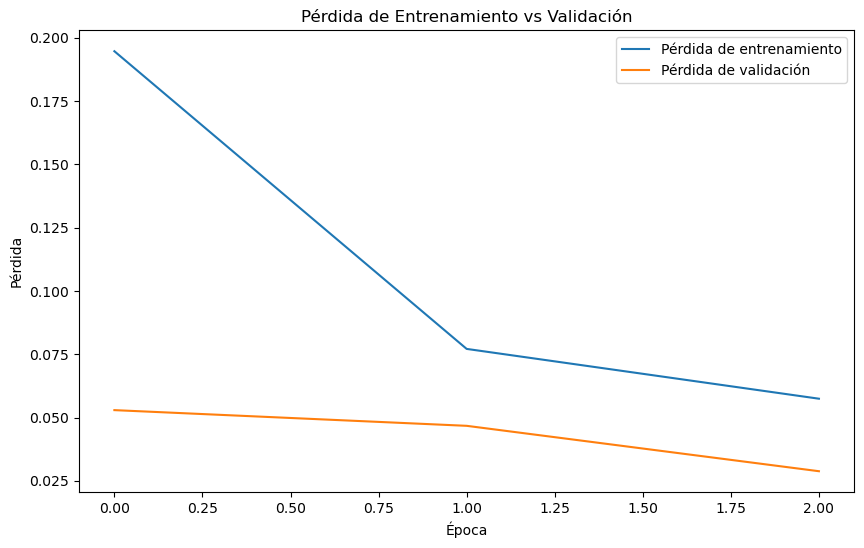

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


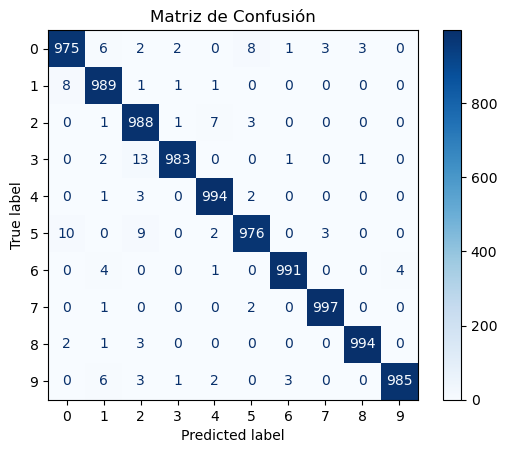

Mejor modelo guardado como: 'mejor_modelo_arabe.h5'
Los mejores hiperparámetros encontrados: {'learning_rate': 0.1, 'batch_size': 32, 'num_filters': 6, 'dense_units': 120, 'activation': 'tanh', 'optimizer': 'sgd', 'dropout_rate': 0.5}
El mejor fitness logrado: 0.9919999837875366


In [46]:
#!/usr/bin/env python
# coding: utf-8

# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import random
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Load the dataset
xtrain = pd.read_csv("csvTrainImages 60k x 784.csv", header=None)
ytrain = pd.read_csv("csvTrainLabel 60k x 1.csv", header=None)
xtest = pd.read_csv("csvTestImages 10k x 784.csv", header=None)
ytest = pd.read_csv("csvTestLabel 10k x 1.csv", header=None)

# Convert to numpy arrays and correct data types
xtrain = xtrain.values.astype('float32')
ytrain = ytrain.values.astype('int32')
xtest = xtest.values.astype('float32')
ytest = ytest.values.astype('int32')

# Reshape the data
xtrain = xtrain.reshape([-1, 28, 28, 1])
xtest = xtest.reshape([-1, 28, 28, 1])

# Normalize the data
xtrain = xtrain / 255.0
xtest = xtest / 255.0

# Split training data into training and validation sets
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.1, random_state=42)

# One-hot encode the labels
ytrain = to_categorical(ytrain, 10)
yval = to_categorical(yval, 10)
ytest = to_categorical(ytest, 10)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'batch_size': [32, 64, 128],
    'num_filters': [6, 16],
    'dense_units': [84, 120],
    'activation': ['relu', 'tanh'],
    'optimizer': ['sgd', 'adam'],
    'dropout_rate': [0.5, 0.7, 0.8]
}

def create_chromosome():
    return {
        'learning_rate': random.choice(param_grid['learning_rate']),
        'batch_size': random.choice(param_grid['batch_size']),
        'num_filters': random.choice(param_grid['num_filters']),
        'dense_units': random.choice(param_grid['dense_units']),
        'activation': random.choice(param_grid['activation']),
        'optimizer': random.choice(param_grid['optimizer']),
        'dropout_rate': random.choice(param_grid['dropout_rate'])
    }

def create_population(size):
    return [create_chromosome() for _ in range(size)]

def select_parents(population, fitnesses, num_parents):
    parents = [x for _, x in sorted(zip(fitnesses, population), key=lambda pair: pair[0], reverse=True)]
    return parents[:num_parents]

def crossover(parent1, parent2):
    child = {}
    for param in param_grid.keys():
        child[param] = random.choice([parent1[param], parent2[param]])
    return child

def mutate(chromosome, mutation_rate=0.1):
    if random.random() < mutation_rate:
        param = random.choice(list(param_grid.keys()))
        chromosome[param] = random.choice(param_grid[param])
    return chromosome

def fitness(chromosome):
    
    model = Sequential([
        Conv2D(chromosome['num_filters'], (3, 3), activation=chromosome['activation'], padding='same', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(chromosome['num_filters'] * 2, (3, 3), activation=chromosome['activation'], padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(chromosome['dense_units'], activation=chromosome['activation']),
        Dropout(chromosome['dropout_rate']),
        Dense(chromosome['dense_units'] // 2, activation=chromosome['activation']),
        Dropout(chromosome['dropout_rate']),
        Dense(10, activation='softmax')
    ])

    
    if chromosome['optimizer'] == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=chromosome['learning_rate'])
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=chromosome['learning_rate'])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    
    history = model.fit(xtrain, ytrain, epochs=3, batch_size=chromosome['batch_size'], validation_data=(xval, yval), verbose=0)

    
    val_accuracy = history.history['val_accuracy'][-1]

    
    return val_accuracy, history.history, model

def plot_overfitting(history):
    train_loss = history['loss']
    val_loss = history['val_loss']

    
    plt.figure(figsize=(10,6))
    plt.plot(train_loss, label='Pérdida de entrenamiento')
    plt.plot(val_loss, label='Pérdida de validación')
    plt.title('Pérdida de Entrenamiento vs Validación')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.show()

def plot_confusion_matrix(model, xtest, ytest):
    y_pred_probs = model.predict(xtest)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(ytest, axis=1)  
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Matriz de Confusión')
    plt.show()

def genetic_algorithm(pop_size, num_generations):
    population = create_population(pop_size)
    best_model = None
    best_fitness = 0
    best_chromosome = None
    best_history = None  # Mejor historial

    for generation in range(num_generations):
        print(f"Generación {generation+1}")

        
        fitnesses = []
        for chromosome in population:
            val_accuracy, history, model = fitness(chromosome)
            fitnesses.append(val_accuracy)
            print(f"Cromosoma: {chromosome}, Fitness: {val_accuracy}")

            
            if val_accuracy > best_fitness:
                best_fitness = val_accuracy
                best_model = model
                best_chromosome = chromosome
                best_history = history  
                print(f"Nuevo mejor modelo con fitness {best_fitness}")

        print(f"El mejor fitness en la generación {generation+1}: {max(fitnesses)}")

        # Selección
        num_parents = pop_size // 2
        parents = select_parents(population, fitnesses, num_parents)

        next_generation = parents.copy()

        while len(next_generation) < pop_size:
            parent1, parent2 = random.sample(parents, 2)
            child = crossover(parent1, parent2)
            child = mutate(child)
            next_generation.append(child)

        population = next_generation
    if best_history is not None:
        plot_overfitting(best_history)
    else:
        print("No se encontró un mejor historial para trazar.")

    if best_model is not None:
        plot_confusion_matrix(best_model, xtest, ytest)
        best_model.save('mejor_modelo_arabe.h5')
        print("Mejor modelo guardado como: 'mejor_modelo_arabe.h5'")

    print("Los mejores hiperparámetros encontrados:", best_chromosome)
    print(f"El mejor fitness logrado: {best_fitness}")
    return best_chromosome, best_model

best_hyperparameters, best_model = genetic_algorithm(pop_size=10, num_generations=5)
